In [678]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
import random

In [585]:
data_info = pd.read_csv('lending_club_info.csv', index_col='LoanStatNew')

In [586]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [587]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [588]:
df = pd.read_csv('lending_club_loan_two.csv')

In [589]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [590]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [591]:
df['loan_amnt'].head(10)

0    10000.0
1     8000.0
2    15600.0
3     7200.0
4    24375.0
5    20000.0
6    18000.0
7    13000.0
8    18900.0
9    26300.0
Name: loan_amnt, dtype: float64

<Axes: xlabel='loan_status', ylabel='count'>

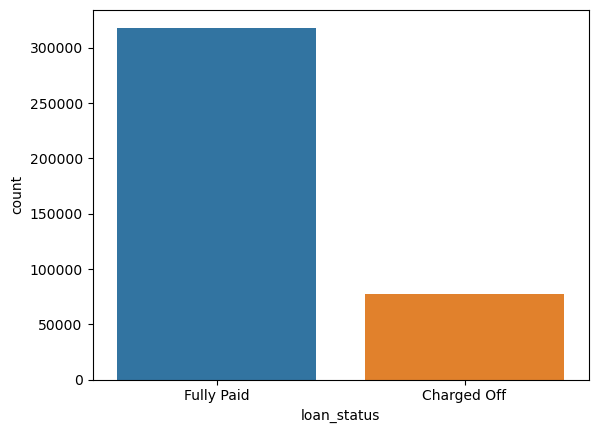

In [592]:
sns.countplot(x='loan_status', data=df)

<Axes: xlabel='loan_amnt', ylabel='Count'>

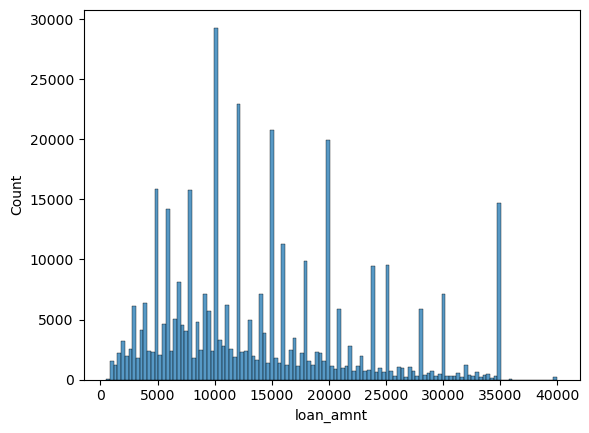

In [593]:
sns.histplot(x='loan_amnt',  data=df)

In [594]:
df.corr()

/var/folders/d0/v94rfq4j1qj6z701_s4s9mg00000gn/T/ipykernel_5712/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


/var/folders/d0/v94rfq4j1qj6z701_s4s9mg00000gn/T/ipykernel_5712/425905036.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

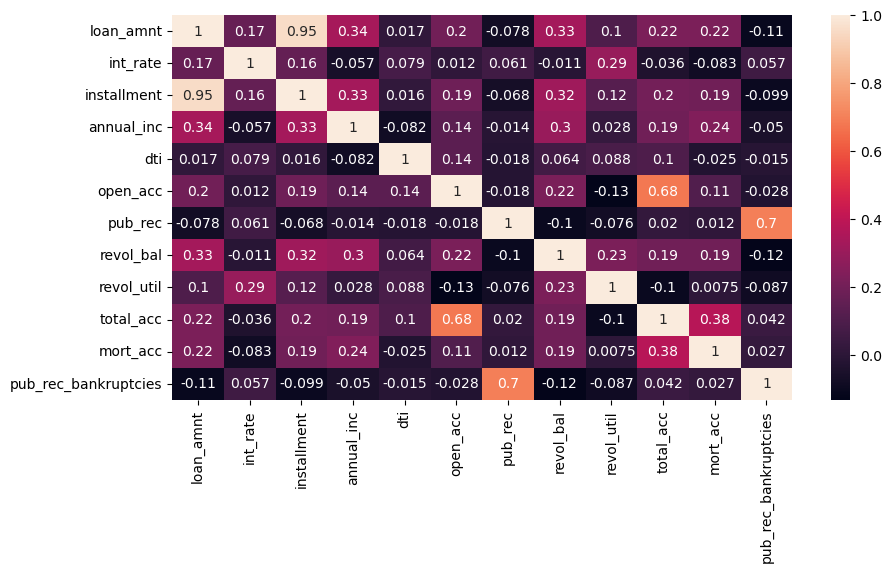

In [595]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='installment', ylabel='loan_amnt'>

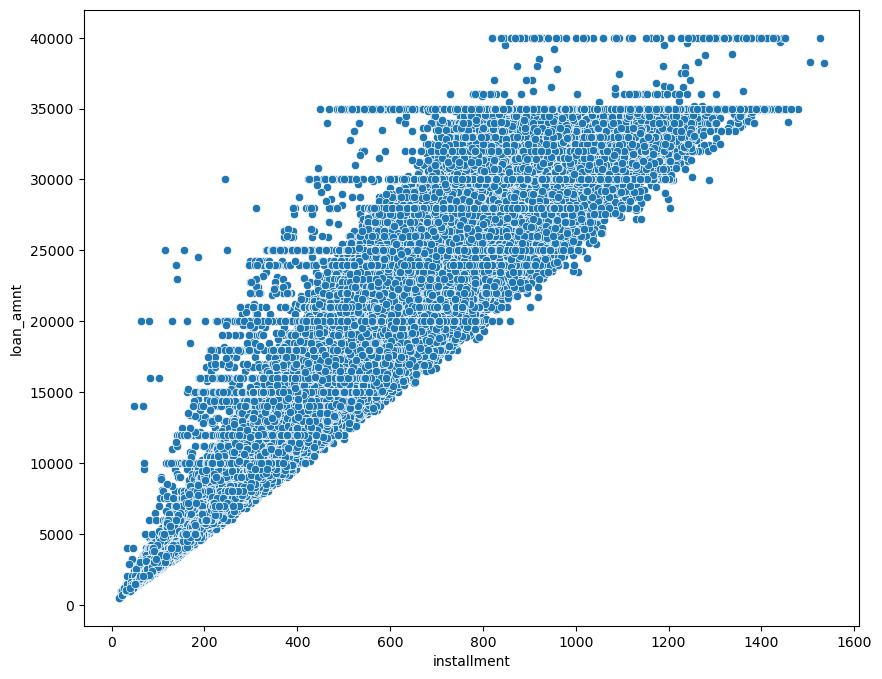

In [596]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='installment', y='loan_amnt', data=df)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

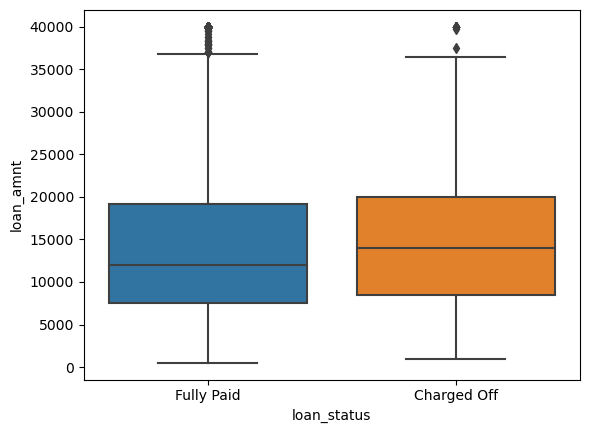

In [597]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

In [598]:
df['loan_amnt'].groupby(df['loan_status']).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [599]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [600]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<Axes: xlabel='grade', ylabel='count'>

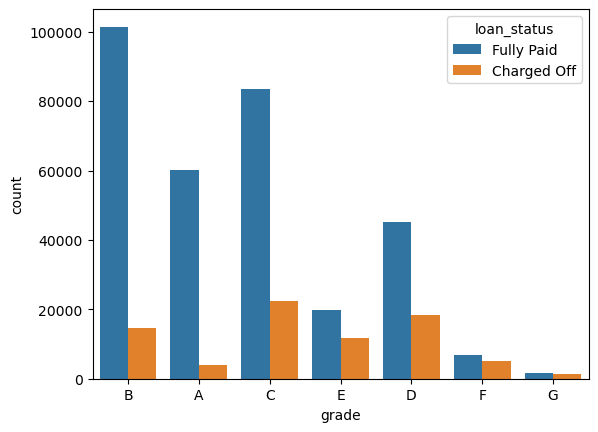

In [601]:
sns.countplot(x='grade', data=df, hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

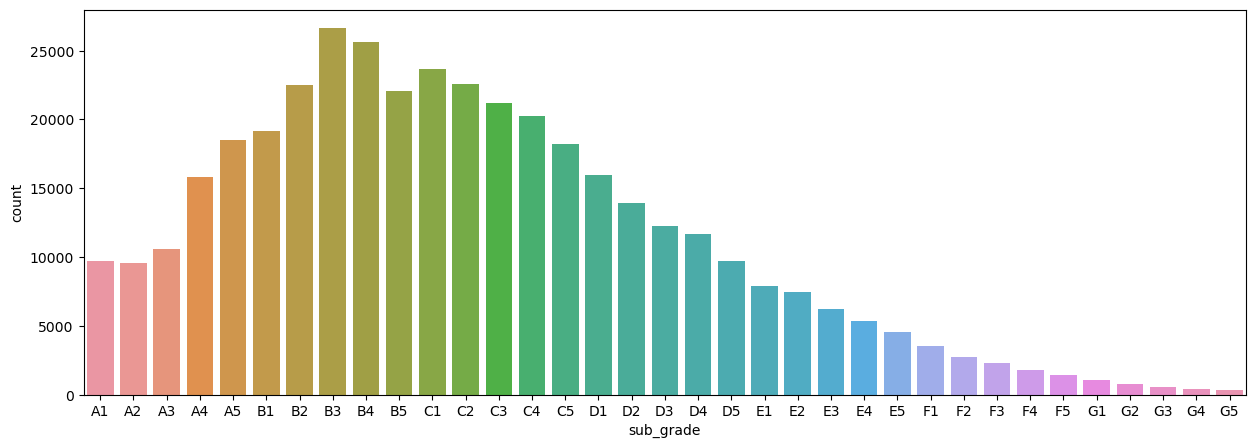

In [602]:
plt.figure(figsize=(15,5))
sns.countplot(x='sub_grade', data=df, order=['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'])

<Axes: xlabel='sub_grade', ylabel='count'>

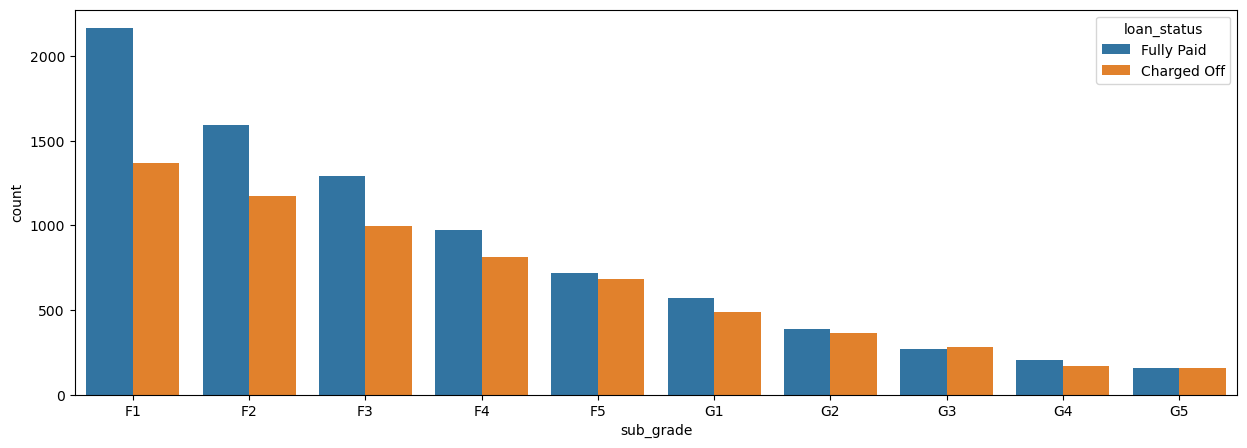

In [603]:
plt.figure(figsize=(15,5))
sns.countplot(x='sub_grade', data=df, order=['F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'], hue='loan_status')

In [604]:
df['loan_repaid'] =  df['loan_status'].apply(lambda loan_status: 1 if loan_status=='Fully Paid' else 0)

/var/folders/d0/v94rfq4j1qj6z701_s4s9mg00000gn/T/ipykernel_5712/1861665451.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['loan_repaid'].sort_values()[:-1].plot(kind='bar')


<Axes: >

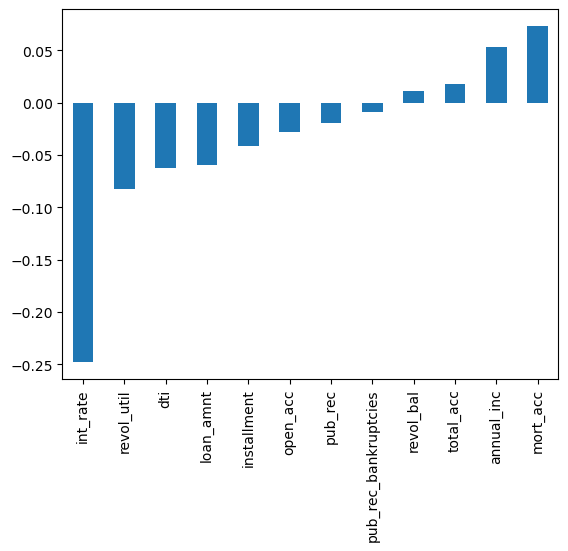

In [605]:
df.corr()['loan_repaid'].sort_values()[:-1].plot(kind='bar')

In [606]:
len(df)


396030

In [607]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [608]:
(df.isnull().sum())/len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [609]:
feat_info('emp_title')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [610]:
df['emp_title'].nunique()

173105

In [611]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [612]:
df = df.drop('emp_title', axis=1)

<Axes: xlabel='emp_length', ylabel='count'>

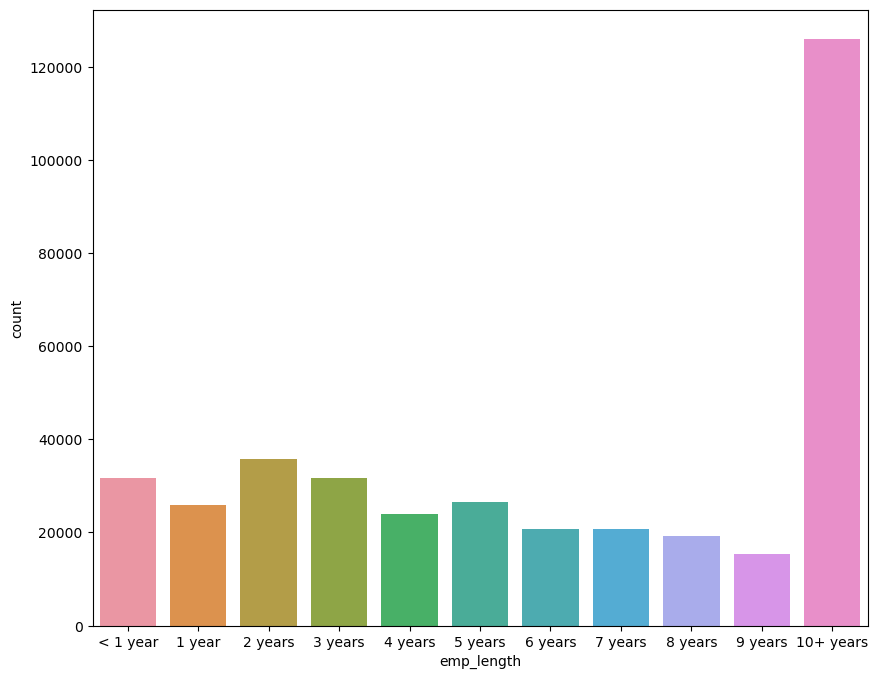

In [613]:
plt.figure(figsize=(10,8))
sns.countplot(x='emp_length', data=df, order=['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years'])

<Axes: xlabel='emp_length', ylabel='count'>

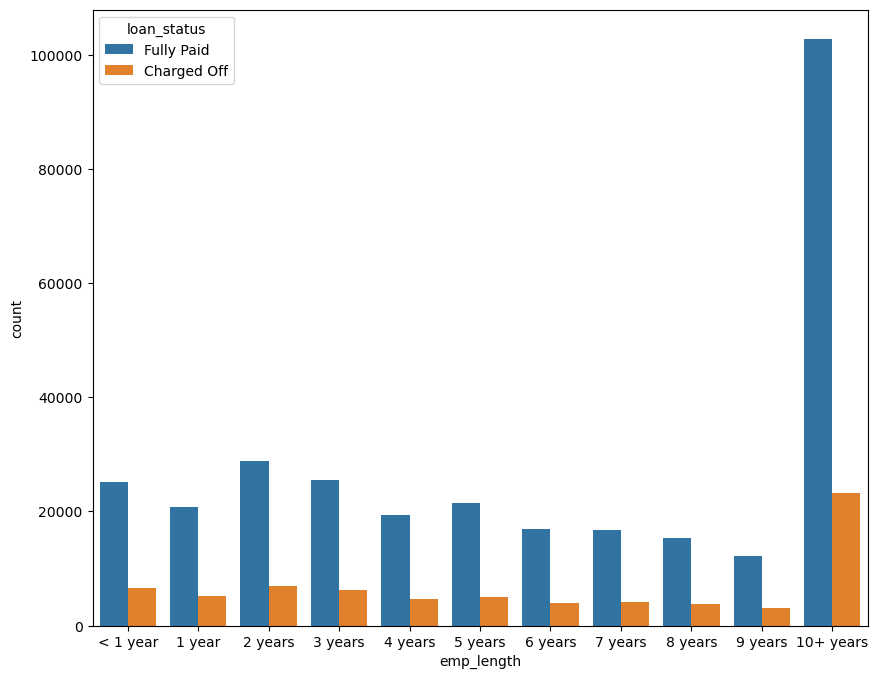

In [614]:
plt.figure(figsize=(10,8))
sns.countplot(x='emp_length', data=df, hue='loan_status', order=['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years'])

In [615]:

emp_charged_off = df[df['loan_repaid'] == 0].groupby('emp_length').count()['loan_repaid']
emp_charged_off

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_repaid, dtype: int64

In [616]:

emp_full_paid = df[df['loan_repaid'] == 1].groupby('emp_length').count()['loan_repaid']
emp_full_paid

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_repaid, dtype: int64

In [617]:
ratio = emp_charged_off / emp_full_paid
ratio

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_repaid, dtype: float64

<Axes: xlabel='emp_length'>

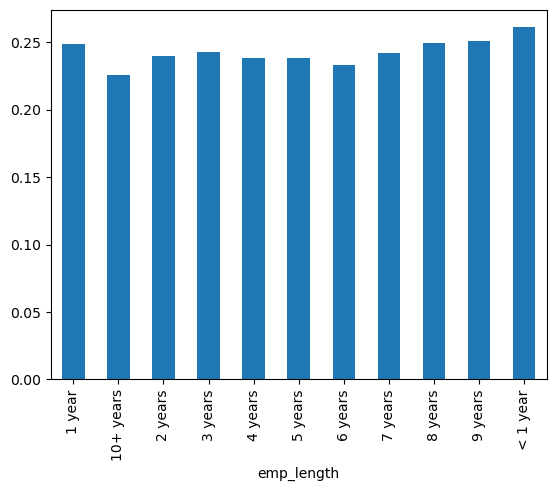

In [618]:
ratio.plot(kind='bar')

In [619]:
df = df.drop('emp_length', axis=1)

In [620]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [621]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [622]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [623]:
df = df.drop('title', axis=1)

In [624]:
df.corr()['mort_acc']

/var/folders/d0/v94rfq4j1qj6z701_s4s9mg00000gn/T/ipykernel_5712/2129682717.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mort_acc']


loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

In [625]:

average_mort_acc_per_total_ = df.groupby('total_acc').mean()['mort_acc']
average_mort_acc_per_total_

/var/folders/d0/v94rfq4j1qj6z701_s4s9mg00000gn/T/ipykernel_5712/292816687.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_mort_acc_per_total_ = df.groupby('total_acc').mean()['mort_acc']


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [626]:
def fill_mort_acc(mort_acc, total_acc):
    if np.isnan(mort_acc):
        return average_mort_acc_per_total_[total_acc]
    return mort_acc

In [627]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['mort_acc'], x['total_acc']), axis=1)

In [628]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [629]:
df = df.drop('pub_rec_bankruptcies', axis=1)

In [630]:
df = df.drop('revol_util', axis=1)

In [631]:
df.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
address                0
loan_repaid            0
dtype: int64

In [632]:
df.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [633]:
df['term'] = df['term'].apply(lambda term: 36 if term == 36 else 60 )

In [634]:
df = df.drop('grade', axis=1)

In [635]:
dummies = pd.get_dummies(df['sub_grade'], drop_first=True)
dummies

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [636]:
df = df.drop('sub_grade', axis=1)

In [637]:
df = pd.concat([df, dummies], axis=1)

In [638]:
df.select_dtypes(include=['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [639]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'address', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [640]:
dummies = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status','purpose']], drop_first=True)
df = df.drop(['verification_status', 'application_type', 'initial_list_status','purpose'], axis=1)
df = pd.concat([df, dummies], axis=1)

In [641]:
df

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,60,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,60,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,60,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,60,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,RENT,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,60,12.29,700.42,MORTGAGE,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,60,9.99,161.32,RENT,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,MORTGAGE,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,...,0,0,0,0,0,0,0,0,0,0


In [642]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [643]:
df['home_ownership'] = df['home_ownership'].replace(to_replace=['NONE','ANY'], value='OTHER')
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)

In [644]:
df = df.drop('home_ownership', axis=1)
df = pd.concat([df, dummies], axis=1)

In [645]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

In [646]:
dummies = pd.get_dummies(df['zip_code'], drop_first=True)
df = df.drop(['address', 'zip_code'], axis=1)
df = pd.concat([df, dummies], axis=1)

In [647]:
df = df.drop('issue_d', axis=1)

In [648]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [649]:
df = df.drop('earliest_cr_line', axis=1)

In [650]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 78 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   term                                 396030 non-null  int64  
 2   int_rate                             396030 non-null  float64
 3   installment                          396030 non-null  float64
 4   annual_inc                           396030 non-null  float64
 5   loan_status                          396030 non-null  object 
 6   dti                                  396030 non-null  float64
 7   open_acc                             396030 non-null  float64
 8   pub_rec                              396030 non-null  float64
 9   revol_bal                            396030 non-null  float64
 10  total_acc                            396030 non-null  float64
 11  mort_acc     

In [651]:
df = df.drop('loan_status', axis=1)

In [652]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [653]:
scalar = MinMaxScaler()

In [654]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [658]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'), )
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'), )
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'), )

model.compile(loss='binary_crossentropy', optimizer='adam')

In [659]:
model.fit(X_train, y_train, epochs=1000, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/1000


2023-02-22 16:44:55.355325: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1238/1238 [==============================] - 2s 1ms/step - loss: 0.3017 - val_loss: 0.2646
Epoch 2/1000
1238/1238 [==============================] - 1s 974us/step - loss: 0.2671 - val_loss: 0.2611
Epoch 3/1000
1238/1238 [==============================] - 1s 986us/step - loss: 0.2643 - val_loss: 0.2602
Epoch 4/1000
1238/1238 [==============================] - 1s 970us/step - loss: 0.2631 - val_loss: 0.2596
Epoch 5/1000
1238/1238 [==============================] - 1s 985us/step - loss: 0.2623 - val_loss: 0.2589
Epoch 6/1000
1238/1238 [==============================] - 1s 1ms/step - loss: 0.2615 - val_loss: 0.2593
Epoch 7/1000
1238/1238 [==============================] - 1s 994us/step - loss: 0.2614 - val_loss: 0.2591
Epoch 8/1000
1238/1238 [==============================] - 1s 1ms/step - loss: 0.2610 - val_loss: 0.2586
Epoch 9/1000
1238/1238 [==============================] - 1s 1ms/step - loss: 0.2604 - val_loss: 0.2585
Epoch 10/1000
1238/1238 [==============================] - 1s 1ms/s

<Axes: >

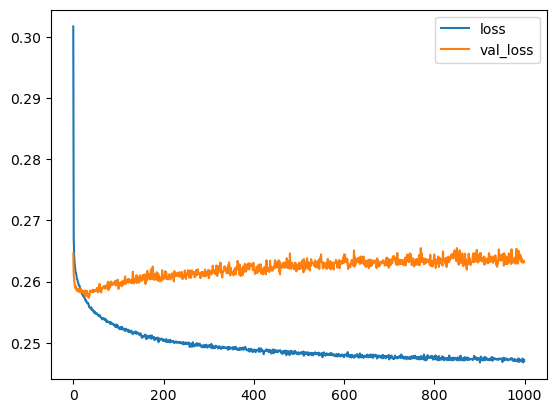

In [660]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [663]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience=25)

In [664]:
model.fit(X_train, y_train, epochs=1000, validation_data=(X_test,y_test), batch_size=256, callbacks=early_stop)

Epoch 1/1000
1238/1238 [==============================] - 1s 1ms/step - loss: 0.2476 - val_loss: 0.2634
Epoch 2/1000
1238/1238 [==============================] - 1s 984us/step - loss: 0.2473 - val_loss: 0.2635
Epoch 3/1000
1238/1238 [==============================] - 1s 972us/step - loss: 0.2473 - val_loss: 0.2632
Epoch 4/1000
1238/1238 [==============================] - 1s 961us/step - loss: 0.2470 - val_loss: 0.2641
Epoch 5/1000
1238/1238 [==============================] - 1s 970us/step - loss: 0.2470 - val_loss: 0.2638
Epoch 6/1000
1238/1238 [==============================] - 1s 963us/step - loss: 0.2470 - val_loss: 0.2643
Epoch 7/1000
1238/1238 [==============================] - 1s 967us/step - loss: 0.2471 - val_loss: 0.2637
Epoch 8/1000
1238/1238 [==============================] - 1s 979us/step - loss: 0.2474 - val_loss: 0.2638
Epoch 9/1000
1238/1238 [==============================] - 1s 964us/step - loss: 0.2475 - val_loss: 0.2635
Epoch 10/1000
1238/1238 [=======================

<Axes: >

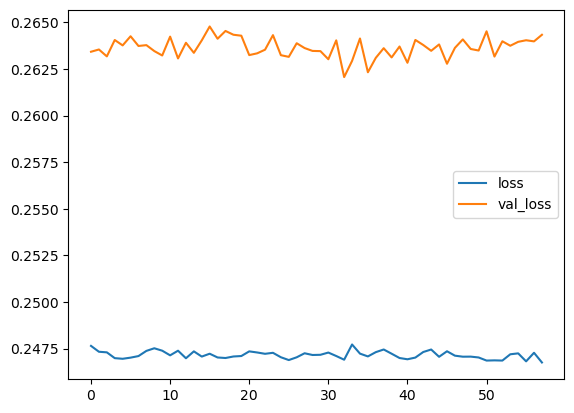

In [665]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [666]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'), )
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu'), )
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'), )

model.compile(loss='binary_crossentropy', optimizer='adam')

In [667]:
model.fit(X_train, y_train, epochs=1000, validation_data=(X_test,y_test), batch_size=256, callbacks=early_stop)

Epoch 1/1000
1238/1238 [==============================] - 2s 1ms/step - loss: 0.3035 - val_loss: 0.2619
Epoch 2/1000
1238/1238 [==============================] - 1s 982us/step - loss: 0.2680 - val_loss: 0.2620
Epoch 3/1000
1238/1238 [==============================] - 1s 982us/step - loss: 0.2647 - val_loss: 0.2605
Epoch 4/1000
1238/1238 [==============================] - 1s 995us/step - loss: 0.2634 - val_loss: 0.2597
Epoch 5/1000
1238/1238 [==============================] - 1s 985us/step - loss: 0.2623 - val_loss: 0.2597
Epoch 6/1000
1238/1238 [==============================] - 1s 1ms/step - loss: 0.2617 - val_loss: 0.2589
Epoch 7/1000
1238/1238 [==============================] - 1s 1ms/step - loss: 0.2610 - val_loss: 0.2585
Epoch 8/1000
1238/1238 [==============================] - 1s 983us/step - loss: 0.2608 - val_loss: 0.2593
Epoch 9/1000
1238/1238 [==============================] - 1s 1ms/step - loss: 0.2606 - val_loss: 0.2584
Epoch 10/1000
1238/1238 [=============================

<Axes: >

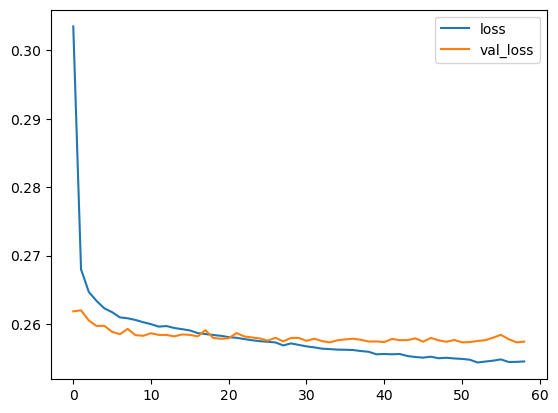

In [668]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [675]:
predictions = (model.predict(X_test)> 0.5).astype("int32")

2476/2476 [==============================] - 1s 275us/step


In [676]:
predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [677]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.46      0.62     15493
           1       0.88      0.99      0.94     63713

    accuracy                           0.89     79206
   macro avg       0.92      0.73      0.78     79206
weighted avg       0.90      0.89      0.87     79206



In [ ]:
#NOW TESTING MODEL TO PREDICT 

In [684]:
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           24000.00
term                   60.00
int_rate               13.11
installment           547.43
annual_inc          85000.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1991.00
Name: 304691, Length: 76, dtype: float64

In [688]:
X_train.shape

(316824, 76)

In [689]:
new_customer.values.reshape(1,76)

array([[2.4000e+04, 6.0000e+01, 1.3110e+01, 5.4743e+02, 8.5000e+04,
        1.0980e+01, 6.0000e+00, 0.0000e+00, 3.5464e+04, 2.9000e+01,
        8.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

In [690]:
scaled_new_customer = scalar.transform(new_customer.values.reshape(1,76))

In [691]:
predictions = (model.predict(scaled_new_customer)> 0.5).astype("int32")

1/1 [==============================] - 0s 10ms/step


In [694]:
predictions

array([[1]], dtype=int32)

In [695]:
df.iloc[random_ind]['loan_repaid']

1.0